## Objective


In this notebook, we are going to look into the structure of the given features in the training and test set. Hopefully, we will be able to find some clues to our problem.

In [1]:
#load the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

In [2]:
#set the random seed
seed = 1234
np.random.seed(seed)
random.seed(seed)

In [3]:
#load the training data
train = pd.read_json('../Input/train.json')
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [4]:
#reshape the training set
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_1']])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_2']])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], 
                          X_band_2[:, :, :, np.newaxis],
                          ((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)
target_train = train['is_iceberg']
print('The shape of training set is',X_train.shape)
print('The percentage of positives in trainig set',np.sum(target_train)/len(target_train))

The shape of training set is (1604, 75, 75, 3)
The percentage of positives in trainig set 0.4694513715710723


### A typical ship's image

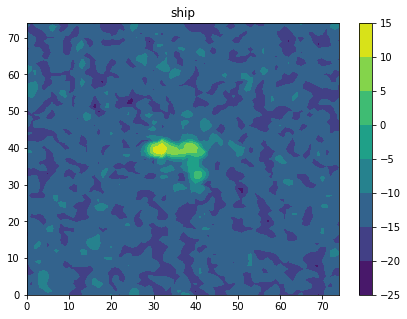

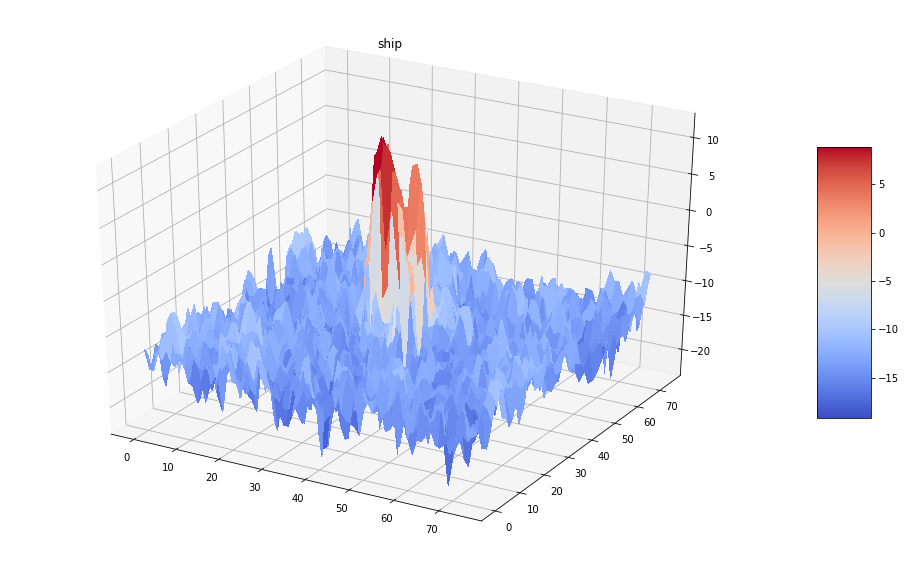

In [5]:
fig = plt.figure(figsize = (7,5))
pixel_size = np.arange(0,75,1)
X,Y = np.meshgrid(pixel_size,pixel_size)
idnum = 1
pixel = np.array(train['band_1'][idnum]).reshape(75,75)
label = train['is_iceberg'][idnum]
plt.contourf(X,Y,pixel)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (17,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pixel, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### A typical iceberg's image

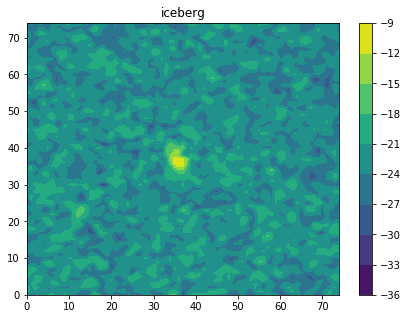

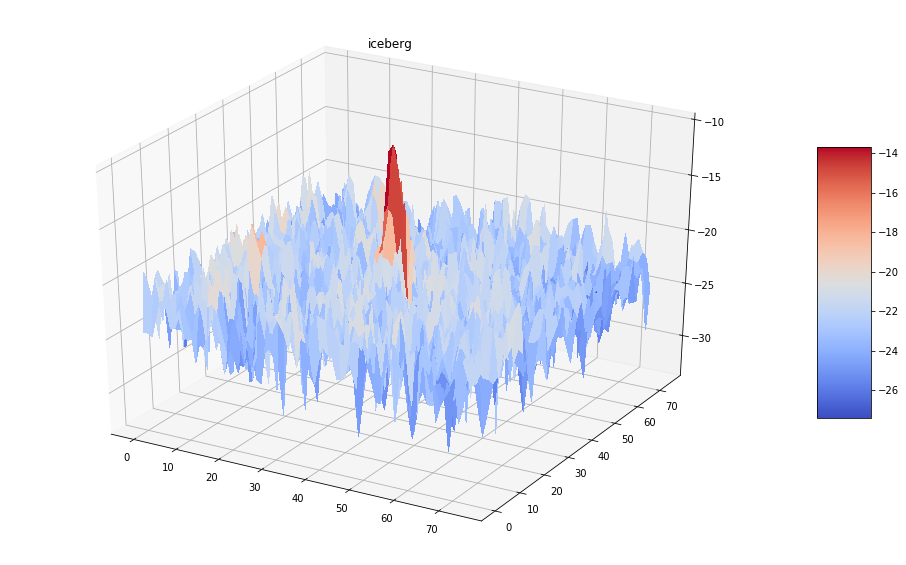

In [6]:
fig = plt.figure(figsize = (7,5))
pixel_size = np.arange(0,75,1)
X,Y = np.meshgrid(pixel_size,pixel_size)
idnum = 2
pixel = np.array(train['band_1'][idnum]).reshape(75,75)
label = train['is_iceberg'][idnum]
plt.contourf(X,Y,pixel)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (17,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pixel, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
# load the test data
test = pd.read_json('../Input/test.json')
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [8]:
# reshape the test set
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test['band_1']])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test['band_2']])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis],
                         X_band_test_2[:, :, :, np.newaxis],
                        ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)
print('The shape of test set is',X_test.shape)

The shape of test set is (8424, 75, 75, 3)


### The distribution of the inc_angle feature

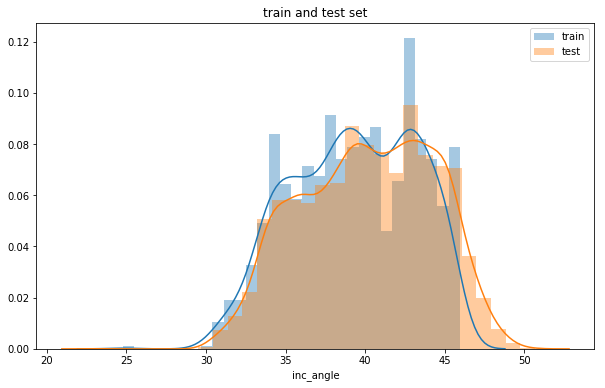

In [9]:
train['inc_angle']=pd.to_numeric(train['inc_angle'],errors = 'coerce')
train = train.dropna()
plt.figure(figsize=(10,6))
sns.distplot(train['inc_angle'],label = 'train',bins = 30)
sns.distplot(test['inc_angle'],label = 'test',bins = 30)
plt.legend()
plt.title('train and test set')
plt.show()

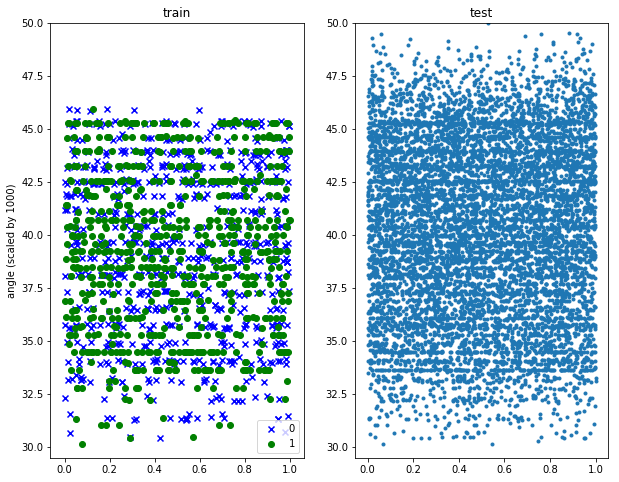

In [12]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(121)
a = plt.scatter(np.random.rand(len(train.loc[train['is_iceberg']==0,'inc_angle'])),
                train.loc[train['is_iceberg']==0,'inc_angle']*1,c = 'b',marker = 'x')
b = plt.scatter(np.random.rand(len(train.loc[train['is_iceberg']==1,'inc_angle'])),
                train.loc[train['is_iceberg']==1,'inc_angle']*1,c = 'g',marker = 'o')
plt.ylim(29.5,50)
plt.ylabel('angle (scaled by 1000)')
plt.title('train')
plt.legend((a,b),('0','1'),loc = 'lower right',scatterpoints = 1 )
fig.add_subplot(122)
plt.scatter(np.random.rand(len(test)),test['inc_angle']*1,marker = '.')
plt.ylim(29.5,50)
plt.title('test')
plt.show()

### Descriptive Statistics of the angle feature in train and test set

In [13]:
descriptive = pd.concat([train.describe()['inc_angle'],test.describe()['inc_angle']],axis = 1)
descriptive.columns = ['train','test']

In [14]:
descriptive

,train,test
count,1471.000000,8424.000000
mean,39.268707,40.153403
std,3.839744,4.108386
min,24.754600,23.080500
25%,36.106100,36.905200
50%,39.501500,40.375790
75%,42.559100,43.472950
max,45.937500,50.661785
